In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Случайное облако 100 000 точек в кубе 100x100x100
points = np.random.uniform(0, 100, size=(100000, 3))
np.savetxt('point_cloud.xyz', points, fmt='%.6f')

points = np.loadtxt('point_cloud.xyz')

In [4]:
def random_subsampling(points, n_samples):
    indices = np.random.choice(points.shape[0], n_samples, replace=False)
    return points[indices]


def voxel_grid_subsampling(points, voxel_size):
    coords = (points / voxel_size).astype(int)
    _, unique_indices = np.unique(coords, axis=0, return_index=True)
    return points[unique_indices]

In [5]:
def farthest_point_sampling(points, k):
    """Выберите первые k точек так, чтобы каждая следующая была максимально далеко от уже выбранных"""
    n_points = points.shape[0]
    
    # Начинаем со случайной точки
    selected_indices = [np.random.randint(0, n_points)]
    selected_points = points[selected_indices]
    
    # Вычисляем расстояния от всех точек до выбранной
    distances = np.linalg.norm(points - selected_points[-1], axis=1)

    for i in range(1, k):
        # Находим точку с максимальным расстоянием до уже выбранных
        farthest_idx = np.argmax(distances)
        selected_indices.append(farthest_idx)
        selected_points = np.vstack([selected_points, points[farthest_idx]])
        
        # Обновляем расстояния
        new_distances = np.linalg.norm(points - points[farthest_idx], axis=1)
        distances = np.minimum(distances, new_distances)
    
    return points[selected_indices]

In [7]:
n_samples = 10000  
voxel_size = 1.0   


start_time = time.time()
subsampled_random = random_subsampling(points, n_samples)
time_random = time.time() - start_time
print(f"   Random subsampling: {time_random:.3f} сек, {subsampled_random.shape[0]} точек")

start_time = time.time()
subsampled_voxel = voxel_grid_subsampling(points, voxel_size)
time_voxel = time.time() - start_time
print(f"   Voxel grid subsampling: {time_voxel:.3f} сек, {subsampled_voxel.shape[0]} точек")

start_time = time.time()
subsampled_fps = farthest_point_sampling(points, n_samples)
time_fps = time.time() - start_time
print(f"   Farthest Point Sampling: {time_fps:.3f} сек, {subsampled_fps.shape[0]} точек")

   Random subsampling: 0.004 сек, 10000 точек
   Voxel grid subsampling: 0.099 сек, 95249 точек
   Farthest Point Sampling: 37.575 сек, 10000 точек


In [8]:
np.savetxt('subsampled_random.xyz', subsampled_random, fmt='%.6f')
np.savetxt('subsampled_voxel.xyz', subsampled_voxel, fmt='%.6f')
np.savetxt('subsampled_fps.xyz', subsampled_fps, fmt='%.6f')

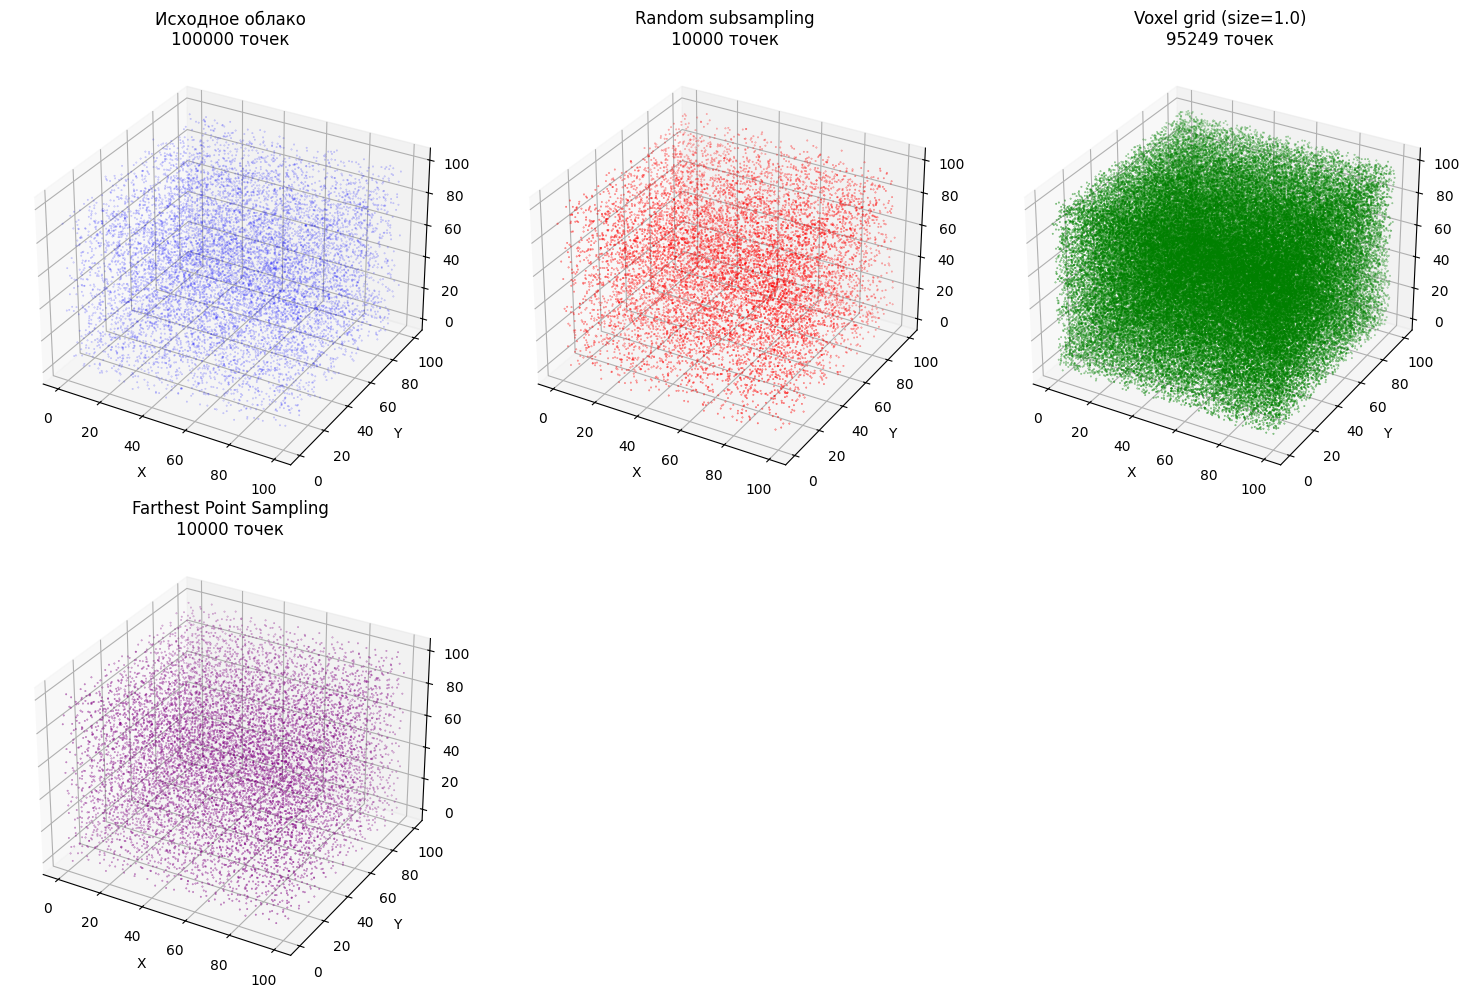

In [11]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(231, projection='3d')
ax1.scatter(points[::10, 0], points[::10, 1], points[::10, 2], 
           c='blue', s=0.1, alpha=0.3)
ax1.set_title(f'Исходное облако\n{points.shape[0]} точек')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# Random subsampling
ax2 = fig.add_subplot(232, projection='3d')
ax2.scatter(subsampled_random[:, 0], subsampled_random[:, 1], subsampled_random[:, 2],
           c='red', s=0.1)
ax2.set_title(f'Random subsampling\n{subsampled_random.shape[0]} точек')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

# Voxel grid subsampling
ax3 = fig.add_subplot(233, projection='3d')
ax3.scatter(subsampled_voxel[:, 0], subsampled_voxel[:, 1], subsampled_voxel[:, 2],
           c='green', s=0.1)
ax3.set_title(f'Voxel grid (size={voxel_size})\n{subsampled_voxel.shape[0]} точек')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')

# Farthest Point Sampling
ax4 = fig.add_subplot(234, projection='3d')
ax4.scatter(subsampled_fps[:, 0], subsampled_fps[:, 1], subsampled_fps[:, 2],
           c='purple', s=0.1)
ax4.set_title(f'Farthest Point Sampling\n{subsampled_fps.shape[0]} точек')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')

plt.tight_layout()
plt.savefig('subsampling_results.png', dpi=150, bbox_inches='tight')
plt.show()